In [1]:
import gempy as gp
import gempy_viewer as gpv
import pickle
import vtk

from gempy.core.data import GeoModel
from gempy.core.data import Grid
from gempy.core.data.grid_modules import RegularGrid
# from PyQt6 import QtWidgets, QtGui

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pyvista as pv
from gempy_engine.core.data.stack_relation_type import StackRelationType


np.random.seed(55500)

Setting Backend To: AvailableBackends.numpy


In [2]:
nx, ny, nz= 100, 100, 100
geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name='Model1',
    extent=[853610.2891, 855569.4948, 987530.5888, 988620.4712, -6600, 4000], #x, y, z
    resolution=[nx, ny, nz],
    refinement=4, # We will use octrees
    importer_helper= gp.data.ImporterHelper(
        # path_to_orientations= "model_fault_orientation1.csv",
        # path_to_surface_points= "model_fault_points.csv",
        path_to_orientations= "model_fault_orientation1.csv",
        path_to_surface_points= "model_fault_points.csv",

    )
)

In [3]:
geo_model.surface_points_copy

X,Y,Z,id,nugget
853614.29,988145.94,1168.10,24267888,0.00
853669.46,988145.94,972.31,24267888,0.00
853771.51,988145.94,583.56,24267888,0.00
853912.88,988145.94,432.56,24267888,0.00
853976.38,988145.94,411.39,24267888,0.00
854161.07,988145.94,446.91,24267888,0.00
854284.93,988145.94,414.28,24267888,0.00
854336.21,988145.94,236.77,24267888,0.00
854391.78,988145.94,287.40,24267888,0.00
854447.34,988145.94,291.70,24267888,0.00


In [4]:
geo_model.orientations_copy

X,Y,Z,G_x,G_y,G_z,id,nugget
853699.02,988145.94,859.69,0.77,0.00,0.64,24267888,0.01
853875.78,988145.94,465.20,0.62,0.00,0.79,24267888,0.01
854173.09,988145.94,450.07,0.29,0.00,0.96,24267888,0.01
854502.90,988145.94,307.75,0.07,0.00,1.00,24267888,0.01
854745.44,988145.94,316.99,0.14,0.00,0.99,24267888,0.01
855018.79,988145.94,69.68,0.15,0.00,0.99,24267888,0.01
855114.09,988145.94,189.14,-0.28,-0.00,0.96,24267888,0.01
855187.47,988145.94,284.85,-0.41,-0.00,0.91,24267888,0.01
855424.03,988145.94,230.34,-0.34,-0.00,0.94,24267888,0.01
855545.16,988145.94,461.85,-0.34,-0.00,0.94,24267888,0.01


In [5]:
geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formation,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Complejo_Dacitico,
	color=#015482,
	is_active=True
),
Element(
	name=Edificio_Volcanico,
	color=#9f0052,
	is_active=True
),
Element(
	name=Flujo_Piroclastico,
	color=#ffbe00,
	is_active=True
),
Element(
	name=Sucesion_Piroclastica,
	color=#728f02,
	is_active=True
),
Element(
	name=Sucesion_Volcanica,
	color=#443988,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

In [6]:
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object=  # TODO: This mapping I do not like it too much. We should be able to do it passing the data objects directly
    {
        "Strat_Series1": 'Edificio_Volcanico',     
        "Strat_Series2": 'Complejo_Dacitico',
        "Strat_Series3": ('Flujo_Piroclastico', 'Sucesion_Piroclastica', 'Sucesion_Volcanica')
    }
)
geo_model.structural_frame  # Display the resulting structural frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Strat_Series1,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Edificio_Volcanico,
	color=#9f0052,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series2,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Complejo_Dacitico,
	color=#015482,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_Series3,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=Flujo_Piroclastico,
	color=#ffbe00,
	is_active=True
),
Element(
	name=Sucesion_Piroclastica,
	color=#728f02,
	is_active=True
),
Element(
	name=Sucesion_Volcanica,
	color=#443988,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False, False],
 [False, False, False],
 [False, False, False]],

C:\Users\gabri\anaconda3\envs\volcan\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:174: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


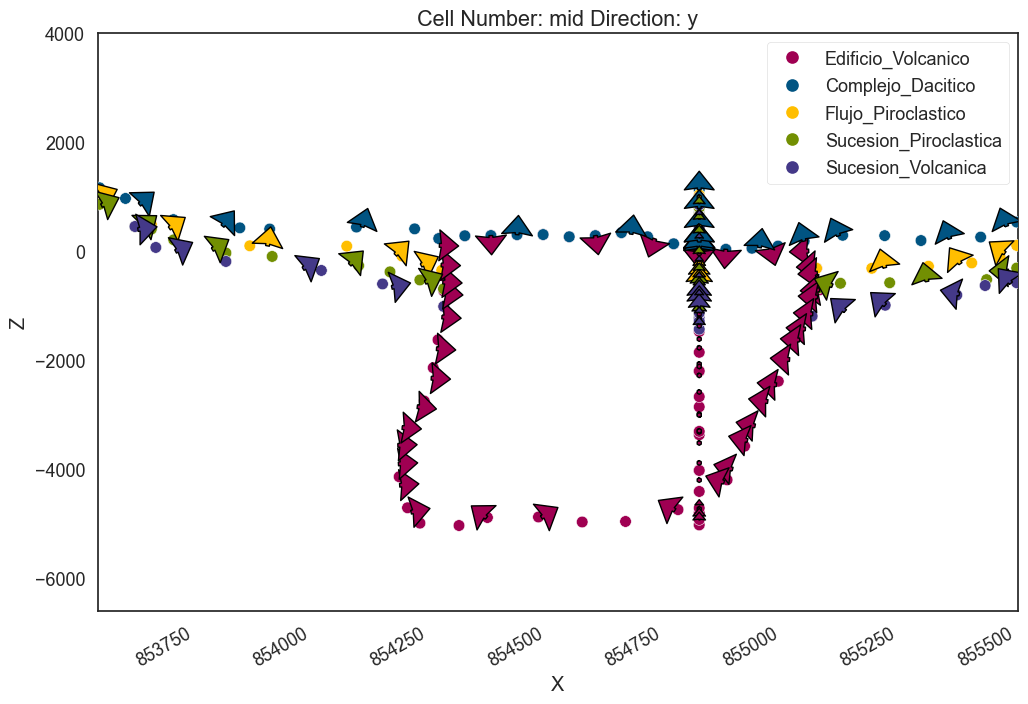

In [7]:
plot = gpv.plot_2d(geo_model, show_lith=False, show_boundaries=False)

In [8]:
geo_model.interpolation_options

InterpolationOptions(kernel_options={'range': 1.7, 'c_o': 10, 'uni_degree': 1, 'i_res': 4, 'gi_res': 2, 'number_dimensions': 3, 'kernel_function': <AvailableKernelFunctions.cubic: KernelFunction(base_function=<function cubic_function at 0x000002215AF3D000>, derivative_div_r=<function cubic_function_p_div_r at 0x000002215AF3D240>, second_derivative=<function cubic_function_a at 0x000002215AF3D2D0>, consume_sq_distance=False)>, 'kernel_solver': <Solvers.DEFAULT: 1>, 'compute_condition_number': False, 'optimizing_condition_number': False, 'condition_number': None}, evaluation_options={'_number_octree_levels': 4, '_number_octree_levels_surface': 4, 'octree_curvature_threshold': -1, 'octree_error_threshold': 1.0, 'octree_min_level': 2, 'mesh_extraction': True, 'mesh_extraction_masking_options': <MeshExtractionMaskingOptions.INTERSECT: 3>, 'mesh_extraction_fancy': True, 'evaluation_chunk_size': 500000, 'compute_scalar_gradient': False, 'verbose': False}, temp_interpolation_values=<gempy_engine.core.data.options.temp_interpolation_values.TempInterpolationValues object at 0x000002215FD82C20>, debug=True, cache_mode=CacheMode.IN_MEMORY_CACHE, cache_model_name=Model1, block_solutions_type=BlockSolutionType.DENSE_GRID, sigmoid_slope=50000, debug_water_tight=False)

In [9]:
geo_model.input_transform.apply_anisotropy(gp.data.GlobalAnisotropy.NONE)
geo_model.interpolation_options.kernel_options.range *= 3.2
# geo_model.interpolation_options.kernel_options.compute_condition_number = True
geo_model.interpolation_options.evaluation_options.evaluation_chunk_size = 500_000

sol = gp.compute_model(
    gempy_model=geo_model,
    engine_config=gp.data.GemPyEngineConfig(
        backend=gp.data.AvailableBackends.PYTORCH
    )
)
sol

Setting Backend To: AvailableBackends.PYTORCH


RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 3186707664 bytes.

In [ ]:
geo_model.solutions

In [ ]:
gpv.plot_2d(
    model=geo_model,
    series_n=0,  # This will plot the scalar field used for the fault
    show_data=False,
    show_scalar=True,
    show_lith=False
)

In [10]:


# gp.compute_model(geo_model)
# gpv.plot_2d(geo_model, 
#             show_topography=True,
#            show_data=True,
#            ve=0.20,
#            figsize=(12,12),
#            show_block=False, 
#             show_values=False,)

In [11]:
gp.set_section_grid(
    grid=geo_model.grid,
    section_dict={
        'Transecta_X': ([853614, 988100], [855566, 988100], [100, 80]), #xi,yi,xf,yf,zi,zf
        'Transecta_Y': ([854900, 987541], [854900, 988613], [100, 80]),
    }  # p1,p2,resolution
)

Active grids: GridTypes.NONE|SECTIONS|DENSE


,start,stop,resolution,dist
Transecta_X,"[853614, 988100]","[855566, 988100]","[100, 80]",1952.0
Transecta_Y,"[854900, 987541]","[854900, 988613]","[100, 80]",1072.0


In [12]:
geo_model.grid.active_grids

<GridTypes.NONE|SECTIONS|DENSE: 1042>

C:\Users\gabri\anaconda3\envs\volcan\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:200: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.fig.show()


<function gempy_viewer.modules.plot_2d.drawer_traces_2d.plot_section_traces(gempy_model: gempy.core.data.geo_model.GeoModel, ax, section_names: list[str] = None)>

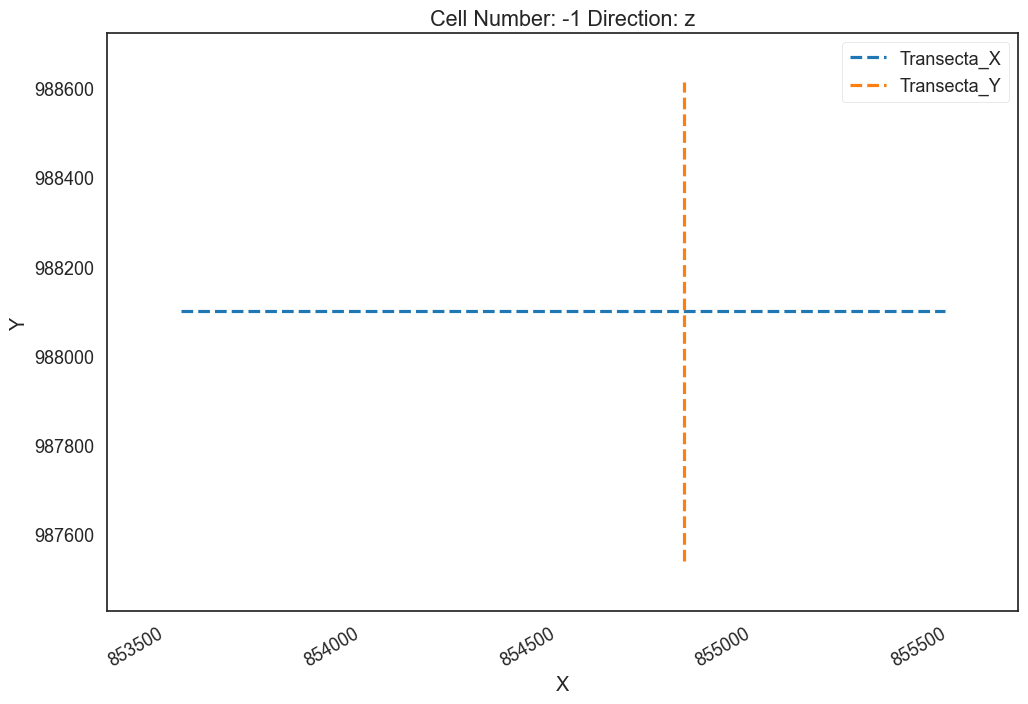

In [13]:
gpv.plot_section_traces(geo_model)

In [14]:
geo_model.interpolation_options.mesh_extraction = False


In [15]:
gp.set_topography_from_file(
    grid=geo_model.grid,
    filepath=os.path.join("Volcan_CM2.tif"),
)

Active grids: GridTypes.NONE|SECTIONS|TOPOGRAPHY|DENSE


In [16]:
geo_model.grid

Grid(values=array([[853620.0851285 , 987536.038212  ,  -6547.        ],
       [853620.0851285 , 987536.038212  ,  -6441.        ],
       [853620.0851285 , 987536.038212  ,  -6335.        ],
       ...,
       [854900.        , 988613.        ,   3731.64556962],
       [854900.        , 988613.        ,   3865.82278481],
       [854900.        , 988613.        ,   4000.        ]]), length=array([], dtype=float64), _octree_grid=None, _dense_grid=RegularGrid(resolution=array([100, 100, 100]), extent=array([853610.2891, 855569.4948, 987530.5888, 988620.4712,  -6600.    ,
         4000.    ]), values=array([[853620.0851285, 987536.038212 ,  -6547.       ],
       [853620.0851285, 987536.038212 ,  -6441.       ],
       [853620.0851285, 987536.038212 ,  -6335.       ],
       ...,
       [855559.6987715, 988615.021788 ,   3735.       ],
       [855559.6987715, 988615.021788 ,   3841.       ],
       [855559.6987715, 988615.021788 ,   3947.       ]]), mask_topo=array([], shape=(0, 3), dtype

In [17]:
geo_model.solutions

In [18]:
gp.compute_model(
    gempy_model=geo_model,
    engine_config=gp.data.GemPyEngineConfig(
        backend=gp.data.AvailableBackends.PYTORCH
    )
)

Setting Backend To: AvailableBackends.PYTORCH


RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 3191387136 bytes.

In [ ]:

gpv.plot_2d(geo_model, 
            section_names=['Transecta_X'], 
            show_topography=True, 
            figsize=(12, 17), 
            show_block=False, 
            show_values=False, 
            n_axis=2, 
            legend=True,
            show_data=False, 
            ve=0.10)